In [8]:
# =============================
# 1️⃣ Import Required Libraries
# =============================
import os

# =============================
# 2️⃣ Set Repository Folder Name and GitHub URL
# =============================
repo_folder = "Final_ML_project"  # Folder name on Colab
git_repo = "https://github.com/noor12155221/FINAL-ML-Project.git"  # GitHub repository URL

# =============================
# 3️⃣ Remove Existing Folder (if any) to Avoid Conflicts
# =============================
if os.path.exists(repo_folder):
    print(f"Found existing folder '{repo_folder}', removing it...")
    !rm -rf {repo_folder}

# =============================
# 4️⃣ Clone the GitHub Repository
# =============================
print(f"Cloning repository into '{repo_folder}'...")
!git clone {git_repo} {repo_folder}

# =============================
# 5️⃣ Change Directory to the Repository Folder
# =============================
%cd {repo_folder}
print(f"Current working directory: {os.getcwd()}")

# =============================
# 6️⃣ List Repository Files
# =============================
print("Files in repository:")
!ls

Cloning repository into 'Final_ML_project'...
Cloning into 'Final_ML_project'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 90 (delta 36), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (90/90), 410.91 KiB | 4.95 MiB/s, done.
Resolving deltas: 100% (36/36), done.
/content/Final_ML_project/Final_ML_project
Current working directory: /content/Final_ML_project/Final_ML_project
Files in repository:
data  notebooks  README.md  results  Yet_another_copy_of_Final_ML_project.ipynb


In [9]:
import pandas as pd

data = pd.read_csv('/content/Final_ML_project/data/heart.csv')
print(data.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_path = "/content/Final_ML_project/data/heart.csv"

df = pd.read_csv(data_path)

print(df.shape)
print(df.dtypes)

target = df.columns[-1]

X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns


# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].mean())
X_test[num_cols] = X_test[num_cols].fillna(X_train[num_cols].mean())


df.to_csv('/content/Final_ML_project/data/heart_processed.csv', index=False)


for col in cat_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print(X_train.shape)
print(X_test.shape)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
(820, 13)
(205, 13)


Mean Squared Error (MSE): 3362.132261034047
Root Mean Squared Error (RMSE): 57.98389656649549
R2 Score: 0.017550127896313605


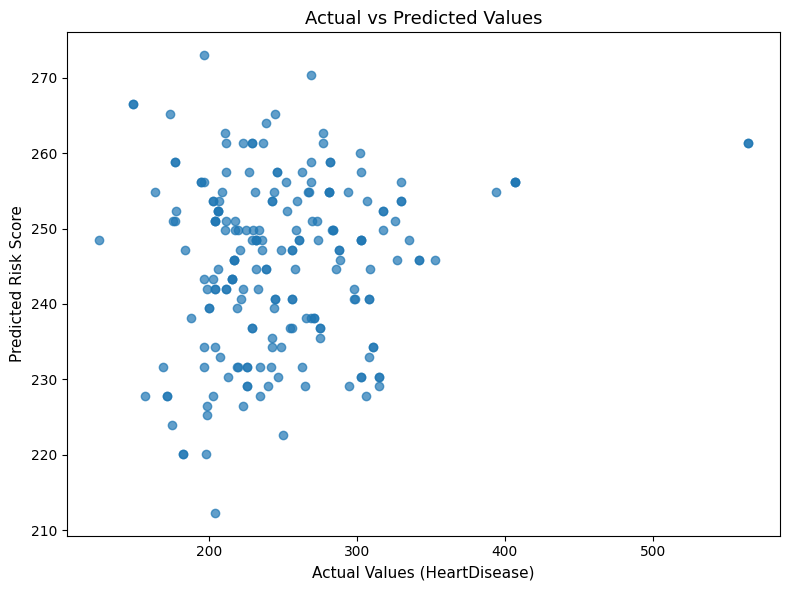

<Figure size 640x480 with 0 Axes>

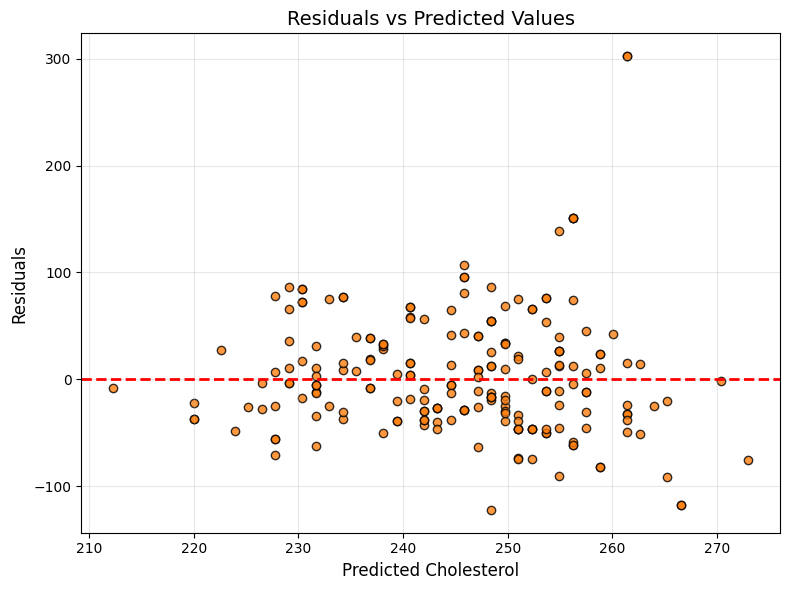

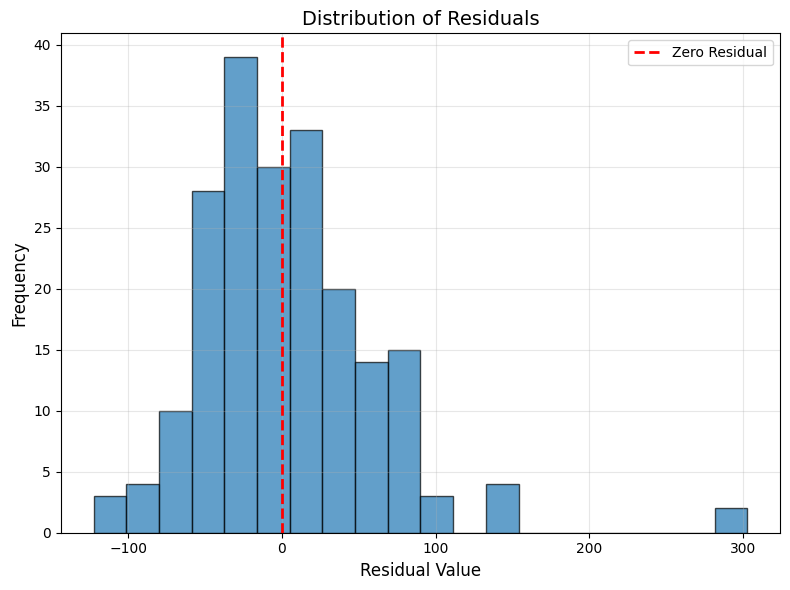

In [11]:

# Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.makedirs("results/plots", exist_ok=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




# Prepare X and y
X = df[['age']]
y = df['chol']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

with open("results/linear_regression_metrics.txt", "w") as f:
    f.write(f"Mean Squared Error (MSE): {mse}\n")
    f.write(f"Root Mean Squared Error (RMSE): {rmse}\n")
    f.write(f"R2 Score: {r2}\n")


# Evaluation Plots
# 1. Actual vs Predicted
# 1. Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values (HeartDisease)", fontsize=11)
plt.ylabel("Predicted Risk Score", fontsize=11)
plt.title("Actual vs Predicted Values", fontsize=13)
plt.tight_layout()

plt.savefig("results/plots/linear_regression.png")

plt.show()
plt.tight_layout()
plt.show()




# 2. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.8, color="#ff7f0e", edgecolor="black")
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Cholesterol", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residuals vs Predicted Values", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("results/plots/residuals_plot.png")

plt.show()

# 3. Residuals Distribution
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color="#1f77b4", edgecolor="black", alpha=0.7)
plt.axvline(0, color="red", linestyle="--", linewidth=2, label="Zero Residual")
plt.xlabel("Residual Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Residuals", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("results/plots/residuals_distribution.png")

plt.show()



In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:

# Classification Task: Logistic Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.makedirs("results/plots", exist_ok=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score



#  Features & Target
X = df.drop("target", axis=1)
y = df["target"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Initialize & Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print Results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(cm)

with open("results/logistic_regression_metrics.txt", "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"Recall: {recall}\n")
    f.write(f"Confusion Matrix:\n{cm}\n")



Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902

Confusion Matrix:
[[73 29]
 [13 90]]


Clustering Data Shape: (1025, 13)


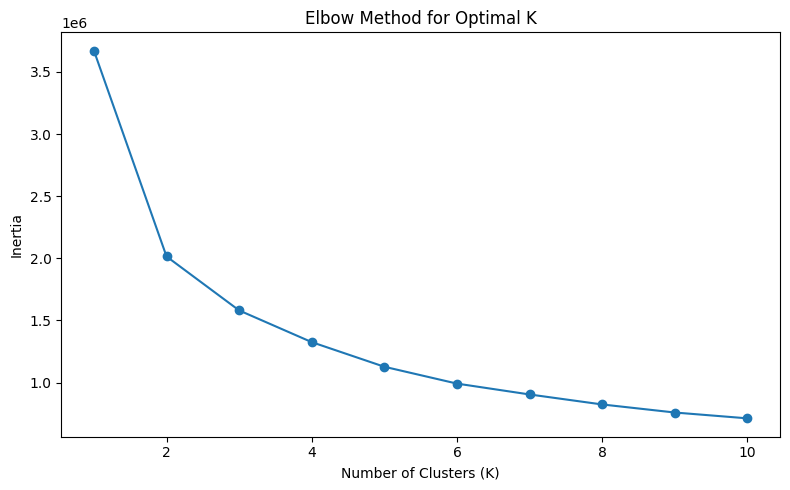

Silhouette Score: 0.3972273135738686


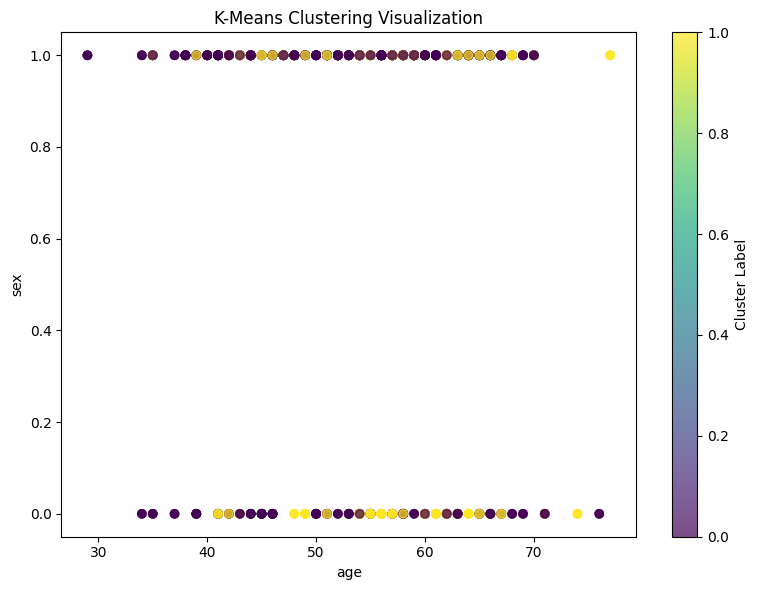

In [14]:
# ===============================
# 10. Import Clustering Libraries
# ===============================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import os
os.makedirs("results/plots", exist_ok=True)

import matplotlib.pyplot as plt
import pandas as pd
import os


os.makedirs("results/plots", exist_ok=True)

# ===============================
# 11. Prepare Data for Clustering
# (WITHOUT labels)
# ===============================

X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)


X_cluster = pd.concat([X_train_df, X_test_df], axis=0)
print("Clustering Data Shape:", X_cluster.shape)

# ===============================
# 12. Elbow Method
# ===============================
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.tight_layout()

plt.savefig("results/plots/elbow_curve.png")

plt.show()

# ===============================
# 13. Fit K-Means (Optimal K)
# ===============================
optimal_k = 2
kmeans = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10
)
cluster_labels = kmeans.fit_predict(X_cluster)

# ===============================
# 14. Silhouette Score
# ===============================
sil_score = silhouette_score(X_cluster, cluster_labels)
print("Silhouette Score:", sil_score)


with open("results/clustering_results.txt", "w") as f:
    f.write(f"Optimal K: {optimal_k}\n")
    f.write(f"Silhouette Score: {sil_score}\n")

# ===============================
# 15. Visualize Clusters
# ===============================

feature_1 = X_cluster.columns[0]
feature_2 = X_cluster.columns[1]

plt.figure(figsize=(8, 6))
plt.scatter(
    X_cluster[feature_1],
    X_cluster[feature_2],
    c=cluster_labels,
    cmap='viridis',
    alpha=0.7
)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("K-Means Clustering Visualization")
plt.colorbar(label="Cluster Label")
plt.tight_layout()

plt.savefig("results/plots/clustering.png")

plt.show()
